In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("whitegrid")
pd.set_option('display.max_columns', 100)
plt.rcParams['font.size'] = 10

### Using Decision Tree

In [6]:
X_train = pd.read_parquet("X_train.parquet")
X_val = pd.read_parquet("X_val.parquet")
X_test = pd.read_parquet("X_test.parquet")

In [8]:
train_target = pd.read_parquet("train_target.parquet")
test_target = pd.read_parquet("test_target.parquet")
val_target = pd.read_parquet("val_target.parquet")

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
model = DecisionTreeClassifier(random_state=40)

In [33]:
model.fit(X_train, train_target.values.ravel())

DecisionTreeClassifier(random_state=40)

In [34]:
train_pred = model.predict(X_train)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [35]:
accuracy_score(train_pred, train_target.values.ravel())

0.9865269461077845

<Axes: >

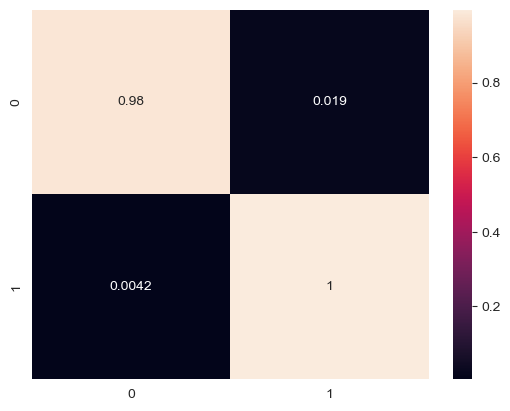

In [36]:
cf = confusion_matrix(train_pred, train_target, normalize='true')
sns.heatmap(cf, annot=True)

In [37]:
val_pred = model.predict(X_val)

0.7982062780269058

<Axes: >

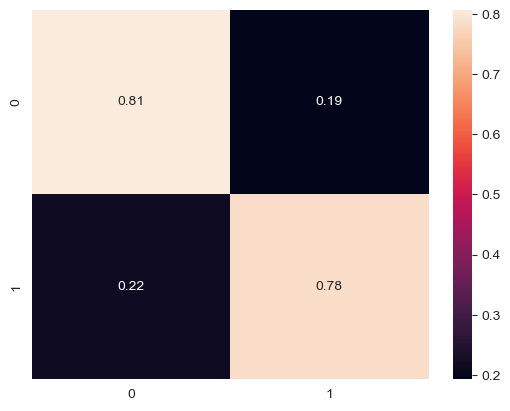

In [26]:
cf = confusion_matrix(val_pred, val_target, normalize='true')
sns.heatmap(cf, annot=True)

In [28]:
test_pred = model.predict(X_test)

In [31]:
accuracy_score(test_pred, test_target)

0.7942583732057417

<Axes: >

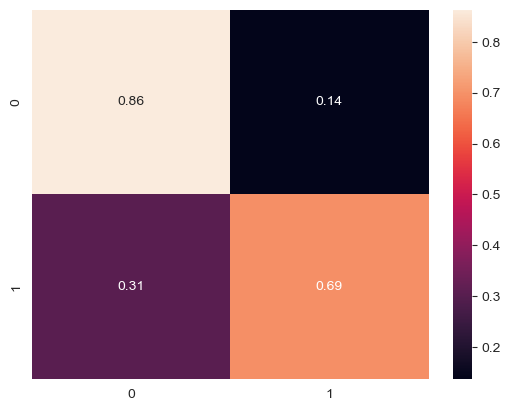

In [29]:
cf = confusion_matrix(test_pred, test_target, normalize='true')
sns.heatmap(cf, annot=True)

In [45]:
def test_params(**params):
    model = DecisionTreeClassifier(random_state=40, **params)
    model.fit(X_train, train_target)
    train_accuracy = model.score(X_train, train_target)
    val_accuracy = model.score(X_val, val_target)
    test_accuracy = model.score(X_test, test_target)
    return {"val_": val_accuracy, "test_": test_accuracy, "train_": train_accuracy,}

In [64]:
max_d = pd.DataFrame([test_params(max_depth=i) for i in list(range(1, 26))])

In [65]:
max_d['Max_depth'] = list(range(1, 26))

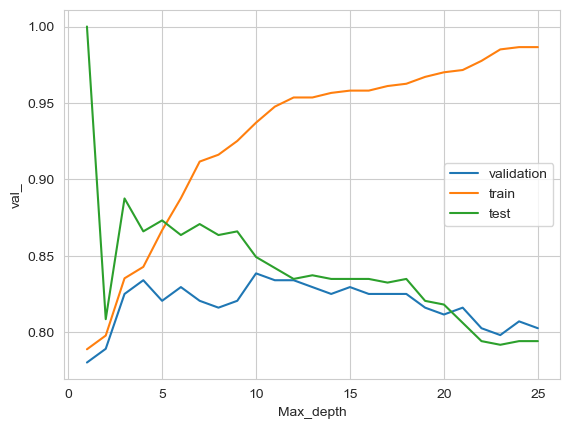

In [69]:
fig, ax = plt.subplots()

sns.lineplot(data=pd.DataFrame(max_d), x='Max_depth', y='val_', label='validation')
sns.lineplot(data=pd.DataFrame(max_d), x='Max_depth', y='train_', label='train')
sns.lineplot(data=pd.DataFrame(max_d), x='Max_depth', y='test_', label='test')
plt.legend()

In [86]:
test_params(max_depth=7)

{'val_': 0.820627802690583,
 'test_': 0.8708133971291866,
 'train_': 0.9116766467065869}

In [88]:
from sklearn.tree import plot_tree, export_text

In [97]:
# plt.figure(figsize=(80, 20), dpi=300)

# plot_tree(model, max_depth=3, filled=True,feature_names = X_train.columns, rounded=True)

In [96]:
# dir(model)
model.get_n_leaves()

141

In [100]:
max_leafs = pd.DataFrame([test_params(max_depth=7, max_leaf_nodes=i) for i in list(range(3, 140))])

In [103]:
max_leafs['Max_depth'] = list(range(3,140))

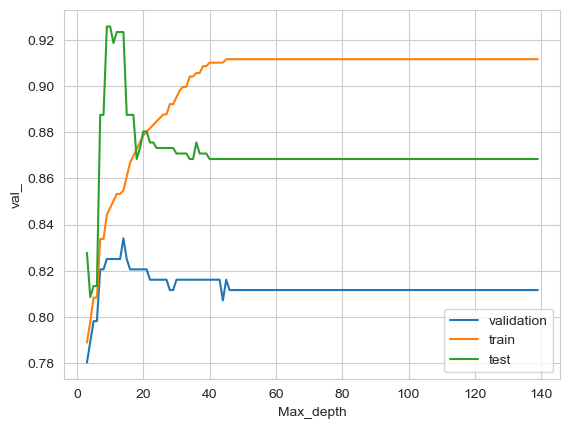

In [104]:
fig, ax = plt.subplots()

sns.lineplot(data=max_leafs, x='Max_depth', y='val_', label='validation')
sns.lineplot(data=max_leafs, x='Max_depth', y='train_', label='train')
sns.lineplot(data=max_leafs, x='Max_depth', y='test_', label='test')
plt.legend()

In [105]:
test_params(max_depth=7, max_leaf_nodes=20)

{'val_': 0.820627802690583,
 'test_': 0.8803827751196173,
 'train_': 0.8787425149700598}

In [108]:
test_params(max_depth=7, max_leaf_nodes=20, min_samples_leaf=30)

{'val_': 0.8026905829596412,
 'test_': 0.9019138755980861,
 'train_': 0.8143712574850299}

In [129]:
min_sample_leafs = pd.DataFrame([test_params(max_depth=7, max_leaf_nodes=20, min_samples_leaf=i) for i in list(range(3, 400))])

In [131]:
min_sample_leafs['Min_leafs'] = list(range(3, 400))

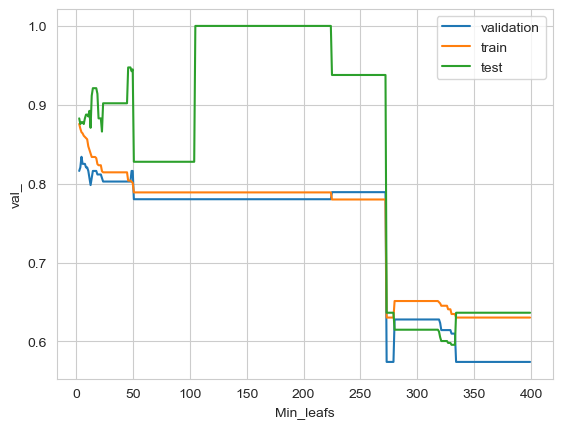

In [132]:
fig, ax = plt.subplots()

sns.lineplot(data=min_sample_leafs, x='Min_leafs', y='val_', label='validation')
sns.lineplot(data=min_sample_leafs, x='Min_leafs', y='train_', label='train')
sns.lineplot(data=min_sample_leafs, x='Min_leafs', y='test_', label='test')
plt.legend()

In [159]:
test_params(max_depth=7, max_leaf_nodes=20)

{'val_': 0.820627802690583,
 'test_': 0.8803827751196173,
 'train_': 0.8787425149700598}

In [160]:
test_params(max_depth=7, max_leaf_nodes=20, min_samples_leaf=50)

{'val_': 0.8161434977578476,
 'test_': 0.9449760765550239,
 'train_': 0.8008982035928144}

In [161]:
model = DecisionTreeClassifier(random_state=40, max_depth=7, max_leaf_nodes=20, min_samples_leaf=50)

In [162]:
model.fit(X_train, train_target)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20, min_samples_leaf=50,
                       random_state=40)

In [163]:
train_pred = model.predict(X_train)

In [164]:
accuracy_score(train_target, train_pred)

0.8008982035928144

<Axes: >

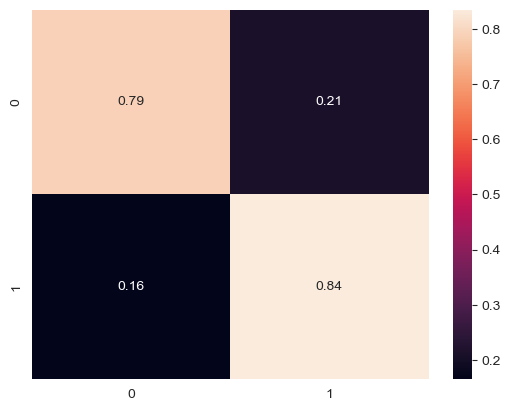

In [165]:
cf = confusion_matrix(train_pred, train_target, normalize='true')
sns.heatmap(cf, annot=True)

In [166]:
val_pred = model.predict(X_val)

In [170]:
test_pred = model.predict(X_test)

In [167]:
accuracy_score(val_target, val_pred)

0.8161434977578476

In [171]:
accuracy_score(test_target, test_pred)

0.9449760765550239

<Axes: >

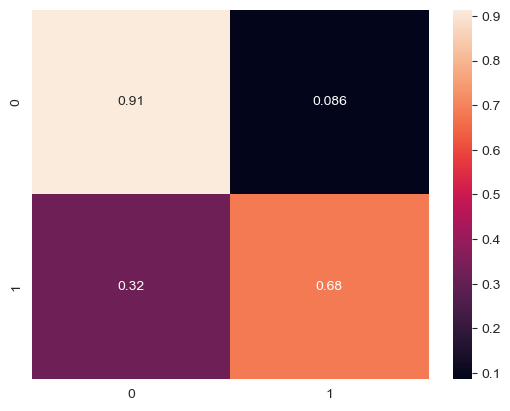

In [169]:
cf = confusion_matrix(val_target, val_pred, normalize='true')
sns.heatmap(cf, annot=True)

<Axes: >

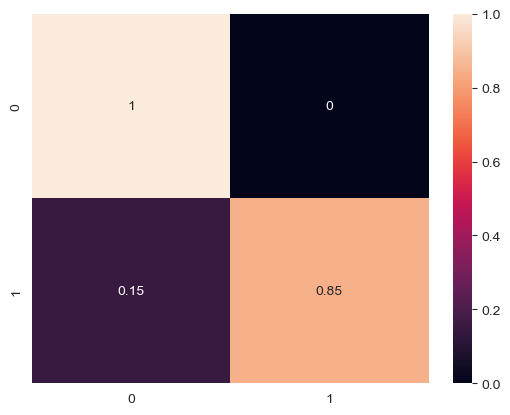

In [172]:
cf = confusion_matrix(test_target, test_pred, normalize='true')
sns.heatmap(cf, annot=True)

In [2]:
# n range of values
#  k size of combination

def calc(n, k):
    output = []
    